In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D 

In [86]:
##give path for the data set
df = pd.read_csv("Mall_Customers.csv")

In [87]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [89]:
df.shape

(200, 5)

In [96]:
#checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [91]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [97]:
#removing null values (if present)
df.dropna(inplace=True)

In [104]:
if "Gender" in df.columns:
    le = LabelEncoder()
    df["Gender"] = le.fit_transform(df["Gender"])

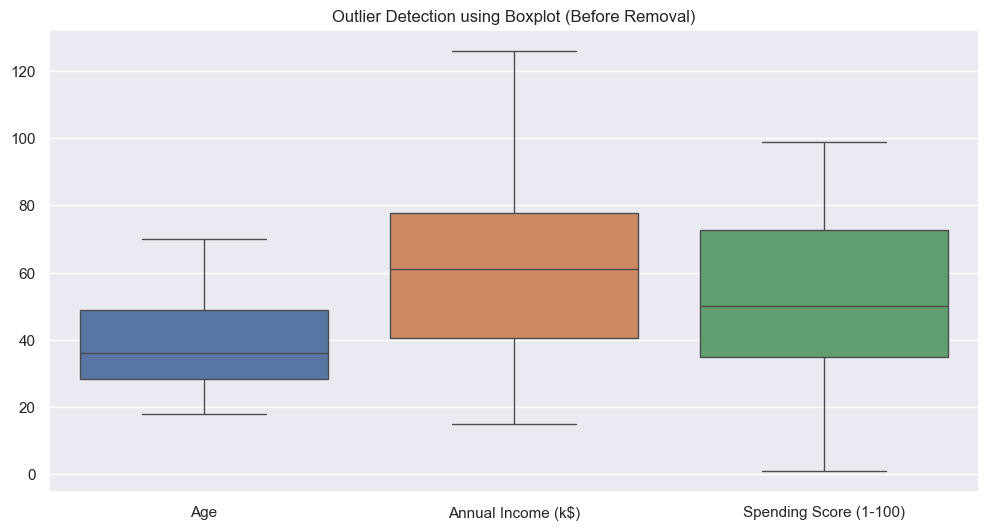

In [109]:
#checking for outliers
features = df.columns[2:5]
plt.figure(figsize=(12,6))
sns.boxplot(data=df[features])
plt.title("Outlier Detection using Boxplot (Before Removal)")
plt.show()

In [110]:
#removing outliers (if present)
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25) 
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return df[(df[col]>=lower) & (df[col]<=upper)]

numeric_cols = [c for c in features if c in df.columns]
for col in numeric_cols:
    df = remove_outliers(df, col)

In [111]:
X = df.iloc[:,2:5].values

In [112]:
print(X)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

In [113]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [114]:
print(X_scaled)

[[-1.42541358 -1.77917141 -0.43598941]
 [-1.2823665  -1.77917141  1.19941337]
 [-1.35389004 -1.73944701 -1.72094874]
 [-1.13931942 -1.73944701  1.04366072]
 [-0.5671311  -1.69972262 -0.39705125]
 [-1.21084296 -1.69972262  1.00472256]
 [-0.28103694 -1.65999822 -1.72094874]
 [-1.13931942 -1.65999822  1.70560947]
 [ 1.79314572 -1.62027383 -1.83776323]
 [-0.63865464 -1.62027383  0.84896992]
 [ 2.00771635 -1.62027383 -1.40944345]
 [-0.28103694 -1.62027383  1.90030028]
 [ 1.36400448 -1.58054943 -1.37050529]
 [-1.06779588 -1.58054943  1.04366072]
 [-0.13798986 -1.58054943 -1.44838161]
 [-1.21084296 -1.58054943  1.12153705]
 [-0.28103694 -1.54082504 -0.59174206]
 [-1.35389004 -1.54082504  0.61534095]
 [ 0.93486324 -1.46137625 -0.82537103]
 [-0.28103694 -1.46137625  1.86136212]
 [-0.28103694 -1.42165185 -0.59174206]
 [-0.99627234 -1.42165185  0.88790808]
 [ 0.505722   -1.38192745 -1.75988691]
 [-0.5671311  -1.38192745  0.88790808]
 [ 1.07791032 -1.26275427 -1.40944345]
 [-0.71017818 -1.26275427

Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [115]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init ="auto", random_state=42)
  kmeans.fit(X_scaled)

  wcss.append(kmeans.inertia_)

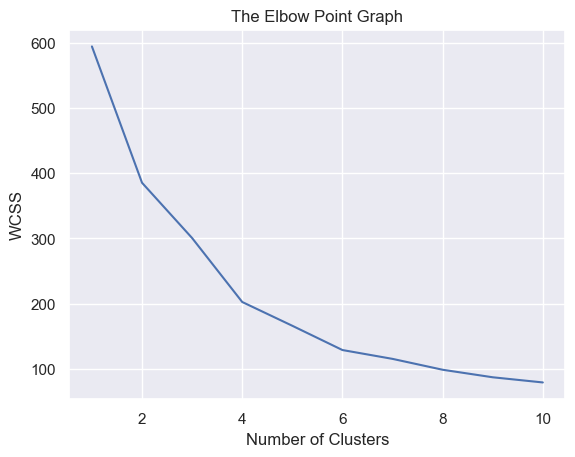

In [116]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [117]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init = "auto", random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X_scaled)
df["Cluster"] = Y

print(Y)

[2 2 3 2 2 2 3 2 0 2 0 2 0 2 3 2 3 2 0 2 3 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 3 2 0 2 0 2 0 2 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 1 1 3 1 4 1 4 1 4 1 3 1 3 1 4 1 3 1 4 1 3 1 3 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 3 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1]


5 Clusters - 0, 1, 2, 3, 4

Visualizing all the Clusters

In [118]:
sil = silhouette_score(X_scaled, Y)
print(f"\nSilhouette Score (K={optimal_k}): {sil:.3f}")


Silhouette Score (K=5): 0.412


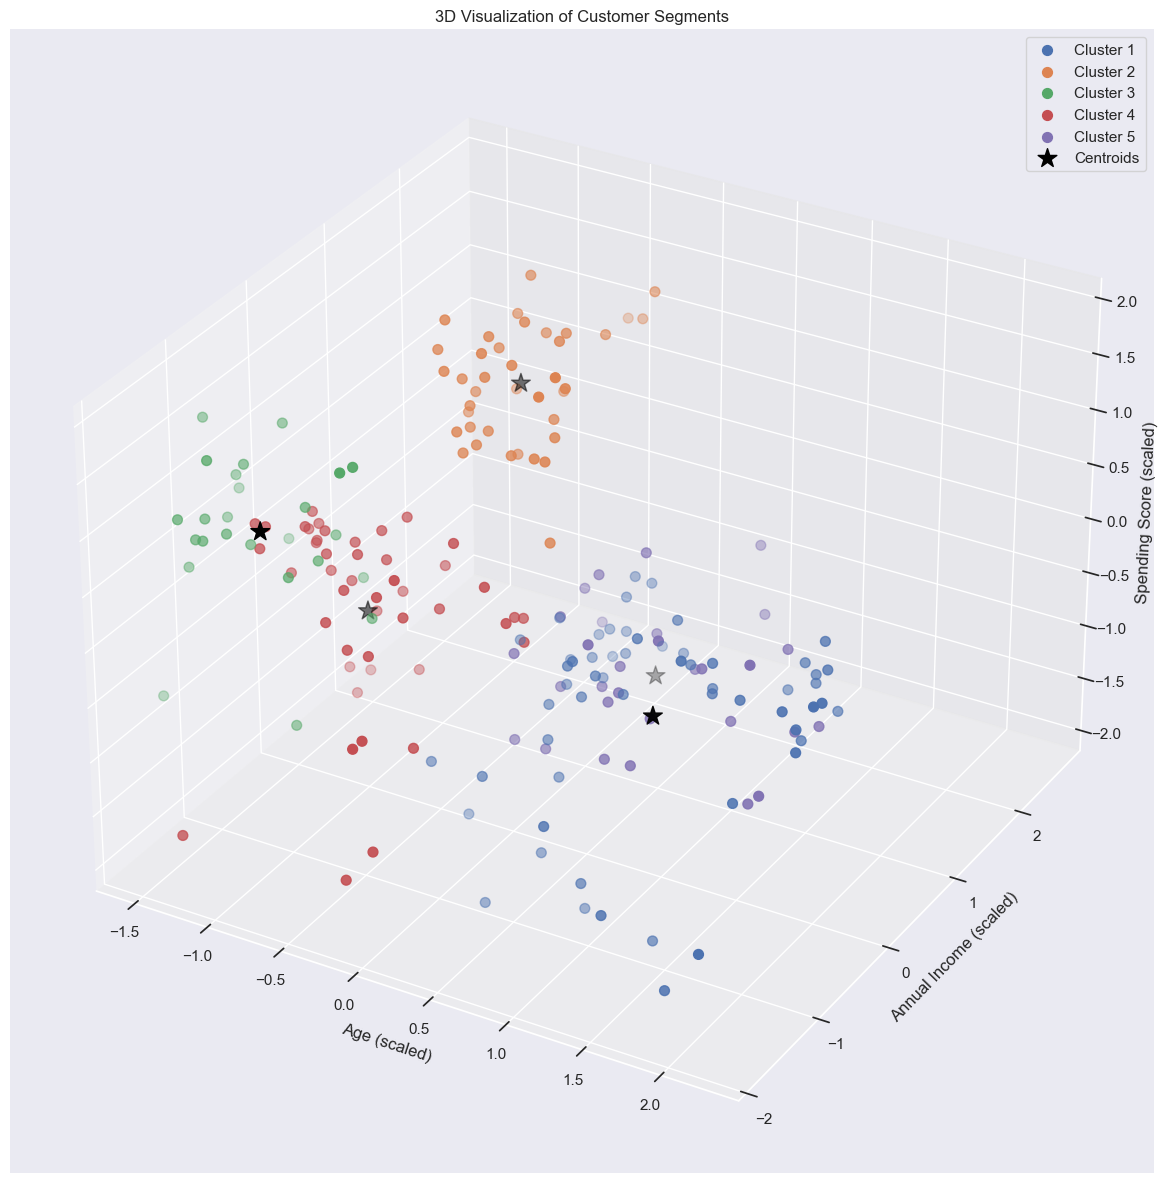

In [119]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection="3d")

# Plot each cluster
for c in range(optimal_k):
    ax.scatter(
        X_scaled[Y == c, 0],
        X_scaled[Y == c, 1],
        X_scaled[Y == c, 2],
        s=50,
        label=f"Cluster {c+1}",
    )

# Plot centroids
centers = kmeans.cluster_centers_
ax.scatter(centers[:,0], centers[:,1], centers[:,2], s=200,c='black', marker="*", label="Centroids")

ax.set_title("3D Visualization of Customer Segments")
ax.set_xlabel("Age (scaled)")
ax.set_ylabel("Annual Income (scaled)")
ax.set_zlabel("Spending Score (scaled)")
ax.legend()
plt.tight_layout()
plt.show()


In [121]:
# Cluster Summary
print("\nCluster-wise averages:")
cluster_summary = df.groupby("Cluster")[features].mean().round(2)
print(cluster_summary)
cluster_labels = {
    0: "Upsell Targets",                    #High income, low spenders
    1: "Premium Customers",                 #High income, high spenders
    2: "Potential Growth",                  #Moderate income, high spenders
    3: "Budget Customers",                  #Low income, low spenders
    4: "General Shoppers"                   #Average income, moderate spenders
}
df["Segment"] = df["Cluster"].map(cluster_labels)
df.head()


Cluster-wise averages:
           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        55.28               47.62                   41.71
1        32.95               84.79                   81.49
2        25.48               25.48                   75.44
3        26.87               54.04                   41.33
4        44.80               88.20                   18.50


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Segment
0,1,1,19,15,39,2,Potential Growth
1,2,1,21,15,81,2,Potential Growth
2,3,0,20,16,6,3,Budget Customers
3,4,0,23,16,77,2,Potential Growth
4,5,0,31,17,40,2,Potential Growth
